In [1]:
# importing libraries for data preprocessing
import pandas as pd

# import libraries for plotting
import cufflinks as cf
import plotly.offline
from  plotly.offline import plot_mpl
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# importing arima model
from pyramid.arima import auto_arima

# import libraries for error metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    



In [2]:
# data preprocessing
# reading dataset
data = pd.read_csv("household_power_consumption.csv")
data.head()

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning:

Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.



,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16-12-2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16-12-2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16-12-2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16-12-2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16-12-2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
# making column datetime
data['Date'] = pd.to_datetime(data['Date'], format = "%d-%m-%Y" )
data = data.assign(Date=data.Date.dt.round('H'))
data = data.reset_index().drop_duplicates(subset='Date', keep='last').set_index('Date')
data.head()

,index,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,,
2006-12-16,395,23:59:00,2.586,0.070,241.630,11.000,0.000,1.000,0.0
2006-12-17,1835,23:59:00,0.276,0.120,244.890,1.200,0.000,1.000,0.0
2006-12-18,3275,23:59:00,0.434,0.248,241.270,2.000,0.000,2.000,0.0
2006-12-19,4715,23:59:00,0.448,0.052,245.680,1.800,0.000,0.000,0.0
2006-12-20,6155,23:59:00,1.888,0.220,243.050,7.800,0.000,0.000,18.0


In [4]:
# removing unwanted data
data = data['Global_active_power']

# changing column name
data.columns = ['Energy Production']
data = data[data != '?']
data = data.astype('float64')

data.head()


Date
2006-12-16    2.586
2006-12-17    0.276
2006-12-18    0.434
2006-12-19    0.448
2006-12-20    1.888
Name: Global_active_power, dtype: float64

In [5]:
#create train/test datasets
train = data[:int((70*len(data)/100))]
valid = data[int((70*len(data)/100)):]

In [6]:
#plotting the data 

data.iplot(title="power")

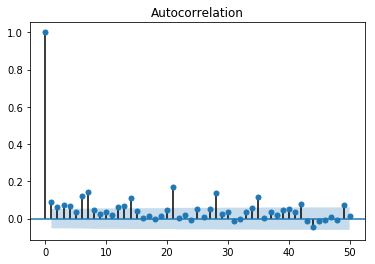

In [7]:
# plotting auto correllation function values
plot_acf(data, lags=50)
pyplot.show()

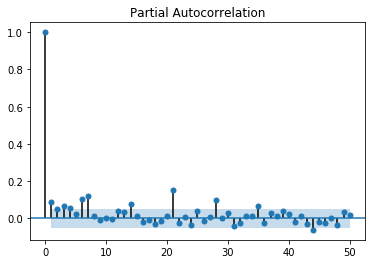

In [8]:
# plotting partial auto correlation function values
plot_pacf(data, lags=50)
pyplot.show()

In [9]:
#train the arima model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, m=24)
model.fit(train)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 24); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 24); AIC=3108.264, BIC=3118.073, Fit time=0.071 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 24); AIC=2830.258, BIC=2849.877, Fit time=2.533 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 24); AIC=2474.156, BIC=2493.775, Fit time=8.039 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 24); AIC=2475.320, BIC=2499.844, Fit time=18.064 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 24); AIC=2475.558, BIC=2490.273, Fit time=0.354 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 24); AIC=2475.707, BIC=2500.231, Fit time=23.443 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 24); AIC=2477.905, BIC=2507.334, Fit time=22.557 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 24); AIC=2475.733, BIC=2500.256, Fit time=6.595 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_o

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 1, 24), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [10]:
# make predictions 
future_forecast = model.predict(n_periods=len(valid))
train_forecast = model.predict(n_periods=len(train))

future_forecast


array([0.45169862, 0.29826989, 0.4569016 , 0.45813657, 0.43415782,
       0.45494617, 0.45326357, 0.45328134, 0.46189332, 0.43415834,
       0.4508892 , 0.44673516, 0.44881957, 0.43634122, 0.45475046,
       0.44500568, 0.446142  , 0.4479098 , 0.39079209, 0.4360919 ,
       0.44756177, 0.43534066, 0.44732864, 0.43860476, 0.4318581 ,
       0.43101172, 0.43016534, 0.42931895, 0.42847257, 0.42762619,
       0.4267798 , 0.42593342, 0.42508704, 0.42424066, 0.42339427,
       0.42254789, 0.42170151, 0.42085512, 0.42000874, 0.41916236,
       0.41831598, 0.41746959, 0.41662321, 0.41577683, 0.41493045,
       0.41408406, 0.41323768, 0.4123913 , 0.41154491, 0.41069853,
       0.40985215, 0.40900577, 0.40815938, 0.407313  , 0.40646662,
       0.40562023, 0.40477385, 0.40392747, 0.40308109, 0.4022347 ,
       0.40138832, 0.40054194, 0.39969555, 0.39884917, 0.39800279,
       0.39715641, 0.39631002, 0.39546364, 0.39461726, 0.39377088,
       0.39292449, 0.39207811, 0.39123173, 0.39038534, 0.38953

In [11]:
# create a comparison dataframe
future_forecast = pd.DataFrame(future_forecast,index = valid.index,columns=['Prediction'])
train_forecast = pd.DataFrame(train_forecast,index = train.index,columns=['Prediction'])
pd.concat([valid,future_forecast],axis=1).iplot(title="Prediction",xTitle='TIme Stamp',yTitle='Demand')

In [12]:
# plotting whole dataset with predictions
pd.concat([data,future_forecast],axis=1).iplot()

In [13]:
#  printing r2 score of our model 
rms = sqrt(mean_squared_error(valid,future_forecast))
print(rms)

0.780934939512371


In [14]:
#  printing mean square error of our model 
r2 = r2_score(valid,future_forecast)
r2

-0.4819348264556127